In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_boston

# Юнит 2

In [15]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [16]:
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
display(boston.data)

#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
#Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)



LinearRegression()

In [20]:

x_dict = {'CRIM': [0.35114],
'ZN': [0.00000],
'INDUS': [7.38000],
'CHAS': [0.00000],
'NOX': [0.49300],
'RM': [6.04100],
'AGE': [49.90000],
'DIS': [4.72110],
'RAD': [5.00000],
'TAX': [287.00000],
'PTRATIO': [19.60000],
'B': [396.90000],
'LSTAT': [7.70000]}

display(features)

x_new = pd.DataFrame(x_dict)

display(x_new)

y = lr_full.predict(x_new)

display(y)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.9,7.7


array([22.86952447])

In [24]:
df_startup = pd.read_csv('../data/50_Startups.csv')

df_startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [30]:
learn_cols = ['R&D Spend', 'Administration', 'Marketing Spend']
model_startup = linear_model.LinearRegression()
X = df_startup[learn_cols]
y = df_startup['Profit']
model_startup.fit(X, y)
display(model_startup.coef_, model_startup.intercept_)

array([ 0.80571505, -0.02681597,  0.02722806])

50122.19298986523

# Юнит 3

In [1]:
from sklearn import metrics

In [4]:
y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]
display(metrics.mean_squared_error(y_true, y_pred)**0.5)

5.746042116100439

In [6]:
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
display(metrics.r2_score(y_true, y_pred))

0.707747874730212

In [11]:
10**0.25

1.7782794100389228

# Юнит 4

In [17]:
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

In [18]:
from sklearn import preprocessing
 
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [19]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42, tol=0.1)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)

SGDRegressor(random_state=42, tol=0.1)

In [21]:
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


# Юнит 6

In [22]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [31]:
data = pd.read_csv('../data/insurance.csv')
display(data.head())
display(data.info())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [25]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [28]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

## Задание 6.1

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 9)

(268, 9)

(1070,)

(268,)

## Задание 6.2

In [35]:
model_data_lr_analit = linear_model.LinearRegression()
model_data_lr_analit.fit(X_train, y_train)
display(model_data_lr_analit.intercept_)

-12390.804294570278

## Задание 6.3

In [38]:
y_train_pred = model_data_lr_analit.predict(X_train)
y_test_pred = model_data_lr_analit.predict(X_test)


display(f'Train R^2: {metrics.r2_score(y_train, y_train_pred)}, test R^2: {metrics.r2_score(y_test, y_test_pred)}')
display(f'Train MAE: {metrics.mean_absolute_error(y_train, y_train_pred)}, test MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')
display(f'Train MAPE: {metrics.mean_absolute_percentage_error(y_train, y_train_pred)}, test MAPE: {metrics.mean_absolute_percentage_error(y_test, y_test_pred)}')

'Train R^2: 0.7417255854683333, test R^2: 0.7835929767120723'

'Train MAE: 4208.234572492221, test MAE: 4181.194473753643'

'Train MAPE: 0.42202685080316354, test MAPE: 0.4688825597914665'

## Задание 6.4

array([ 7094.54007011,  8344.72998713,  9153.77419778, ...,
       11441.08519155, 37314.37460682, 11453.12102783])

<AxesSubplot:>

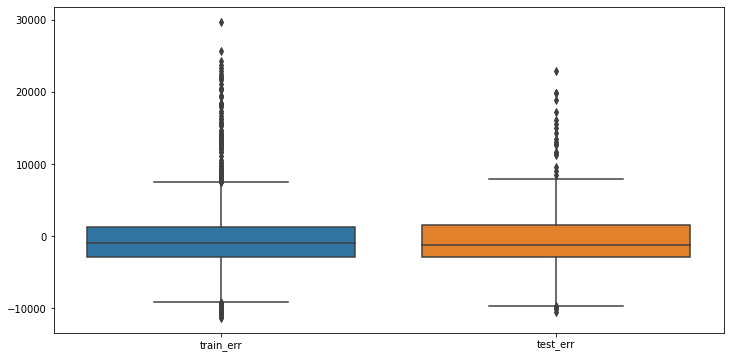

In [41]:
display(y_train_pred)


fig01, ax01 = plt.subplots(figsize=(12, 6))
y_train_err = y_train - y_train_pred
y_test_err = y_test - y_test_pred
df_err = pd.DataFrame({'train_err': y_train_err, 'test_err': y_test_err})
sns.boxplot(data=df_err, ax=ax01)

## Задание 6.5

In [51]:
scaler_minmax = preprocessing.MinMaxScaler()
scaler_minmax.fit(X_train)

X_train_scaled = scaler_minmax.transform(X_train)
X_test_scaled = scaler_minmax.transform(X_test)

polygen_2d = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
polygen_2d.fit(X_train)

X_train_scaled_poly = polygen_2d.transform(X_train_scaled)
X_test_scaled_poly = polygen_2d.transform(X_test_scaled)

display(X_train_scaled_poly.shape, X_test_scaled_poly.shape)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


(1070, 54)

(268, 54)

## Задание 6.6

In [52]:
model_data_lr_analit02 = linear_model.LinearRegression()
model_data_lr_analit02.fit(X_train_scaled_poly, y_train)

display(metrics.r2_score(y_test, model_data_lr_analit02.predict(X_test_scaled_poly)))

0.8664912564597489

## Задание 6.7

In [53]:
display(model_data_lr_analit02.coef_)

array([-1.07006462e+17,  1.57585841e+15,  2.48455708e+16, -4.71718735e+16,
        2.42637654e+14,  3.04607874e+15,  1.22931720e+15,  1.55373745e+15,
        2.27377216e+15,  8.51200000e+03,  8.40000000e+02,  9.84000000e+02,
       -1.60800000e+03,  1.60000000e+02,  1.07006462e+17,  1.07006462e+17,
        1.07006462e+17,  1.07006462e+17, -3.22930874e+14,  6.15000000e+02,
       -1.22700000e+03,  2.18500000e+02, -1.25292753e+15, -1.25292753e+15,
       -1.25292753e+15, -1.25292753e+15, -9.75525000e+03,  1.58437500e+03,
        5.47966250e+04, -2.48455708e+16, -2.48455708e+16, -2.48455708e+16,
       -2.48455708e+16, -2.08150000e+03, -2.23200000e+03,  4.71718735e+16,
        4.71718735e+16,  4.71718735e+16,  4.71718735e+16,  4.17277337e+14,
       -6.59914991e+14, -6.59914991e+14, -6.59914991e+14, -6.59914991e+14,
        3.57380758e+14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.17414230e+15,  0.00000000e+00,  0.00000000e+00,  1.84972205e+15,
        0.00000000e+00,  

## Задание 6.8

In [60]:
model_data_lr_l1_poly = linear_model.Lasso(max_iter=2000)
model_data_lr_l1_poly.fit(X_train_scaled_poly, y_train)

y_test_pred = model_data_lr_l1_poly.predict(X_test_scaled_poly)


display(f'test R^2: {metrics.r2_score(y_test, y_test_pred)}')
display(f'test MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')
display(f'test MAPE: {metrics.mean_absolute_percentage_error(y_test, y_test_pred)}')

display(model_data_lr_l1_poly.coef_)

'test R^2: 0.8668072143180998'

'test MAE: 2719.3341297308816'

'test MAPE: 0.30069898575817533'

array([ 3.24221653e+03, -4.92313816e+02,  5.07612317e+03,  4.58362056e+03,
        1.97928569e+03,  1.88025707e+02, -4.70775218e+02,  5.83657101e+02,
       -2.43543456e+02,  8.29826751e+03,  7.74581954e+02,  8.44448593e+02,
       -1.20775688e+03,  1.34809915e+02, -1.04309726e+03, -0.00000000e+00,
        1.16964229e+03,  1.61765564e+03, -0.00000000e+00,  5.05847740e+02,
       -1.13425152e+03,  2.65796922e+02, -1.22240479e+03,  0.00000000e+00,
        2.36213242e+02, -5.80031340e+02, -8.17963257e+03,  1.29487768e+03,
        5.47148553e+04,  3.58531873e+03,  2.40690210e+03, -9.63549427e+02,
        0.00000000e+00, -1.67464337e+03, -2.05436459e+03,  1.94204864e+03,
        1.95394442e+03, -0.00000000e+00, -1.06364416e+03,  8.00606774e+00,
        5.93688978e+02, -0.00000000e+00, -2.30643423e+02,  1.97933477e+03,
        6.31615519e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

## Задание 6.9

In [61]:
model_data_lr_l2_poly = linear_model.Ridge(max_iter=2000)
model_data_lr_l2_poly.fit(X_train_scaled_poly, y_train)

y_test_pred = model_data_lr_l2_poly.predict(X_test_scaled_poly)


display(f'test R^2: {metrics.r2_score(y_test, y_test_pred)}')
display(f'test MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')
display(f'test MAPE: {metrics.mean_absolute_percentage_error(y_test, y_test_pred)}')

display(model_data_lr_l2_poly.coef_)

'test R^2: 0.8633376617823771'

'test MAE: 2860.554539647021'

'test MAPE: 0.31379749952309743'

array([ 3369.38386245,  -457.59604061,  3655.82413935,  3198.89989857,
        2682.62197133,   199.05715111,  -228.717235  ,   191.94660928,
        -162.28652539,  7548.51142058,   581.66782381,   935.50427948,
        -681.52086519,   663.45387027,  -450.92174702,   438.63623056,
        1406.72601433,  1974.94336458,  -457.59604061,   947.62267378,
        -902.74408745,   739.02044241,  -822.63208356,   302.52583364,
         351.60830856,  -289.09809926, -4274.11806366,  2734.55631801,
       44541.21377369,  3667.33801864,  1719.64618126, -1249.79159857,
        -481.36846198, -1314.96604775, -2172.72264458,  2171.5603185 ,
        1997.18187938,   112.64828731, -1082.49058663,  2682.62197133,
          94.23317954,  -208.05994804,   535.71682279,  2260.73191704,
         199.05715111,     0.        ,     0.        ,     0.        ,
        -228.717235  ,     0.        ,     0.        ,   191.94660928,
           0.        ,  -162.28652539])